## Spotify Audio Features Cluster Analysis
~ (C) - BHAVESH ADHIKARI Jun, 2025

This notebook aims to cluster Nepalese Spotify songs based on their audio features to identify distinct musical groups and understand their characteristics.

In [ ]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# allowing all the columns to be visualized
pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv('spotify_2340.csv', index_col=0)
df.head()

,Title,Artist,Release,BPM,Energy,Dance,Loud,Valence,Length,Acoustic,Pop.,A.Sep,Rnd
#,,,,,,,,,,,,,
1,Sparsha Sangeet,Purna Rai,2024-07-07,130.0,55.0,59.0,-9.0,33.0,06:08,28.0,58.0,43.0,7379.0
2,Kalo/Seto,Purna Rai,2023-11-01,180.0,44.0,35.0,-7.0,41.0,04:29,48.0,57.0,295.0,7469.0
3,Manaka kura,Purna Rai,2022-11-10,103.0,46.0,79.0,-8.0,28.0,03:36,72.0,56.0,514.0,4899.0
4,Mann cha?,Purna Rai,2024-04-17,130.0,7.0,47.0,-20.0,20.0,02:59,90.0,46.0,706.0,4334.0
5,Aau Na,Lov X,2023-12-04,83.0,44.0,62.0,-12.0,21.0,01:45,3.0,0.0,8.0,3450.0


In [ ]:
# shape of the dataset
print("Data Frame Dimensions:")
print("Lines:\t\t{}".format(df.shape[0]))
print("Columns:\t{}".format(df.shape[1]))

Data Frame Dimensions:
Lines:		2340
Columns:	13


In [ ]:
df.isnull().sum()

Title        0
Artist      36
Release     36
BPM         36
Energy      36
Dance       36
Loud        36
Valence     36
Length      36
Acoustic    36
Pop.        36
A.Sep       36
Rnd         36
dtype: int64

In [ ]:
df= df.dropna()

In [ ]:
df.isnull().sum()

Title       0
Artist      0
Release     0
BPM         0
Energy      0
Dance       0
Loud        0
Valence     0
Length      0
Acoustic    0
Pop.        0
A.Sep       0
Rnd         0
dtype: int64

In [ ]:
df.describe()

,BPM,Energy,Dance,Loud,Valence,Acoustic,Pop.
count,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000,2304.000000
mean,121.118924,54.671441,57.325521,-9.079861,52.929688,48.103733,18.603299
std,30.272015,18.926903,13.773710,3.488167,22.429168,30.309979,16.567936
min,46.000000,1.000000,17.000000,-33.000000,4.000000,0.000000,0.000000
25%,95.000000,42.000000,48.000000,-11.000000,35.000000,20.000000,0.000000
50%,121.000000,55.000000,58.000000,-9.000000,53.000000,51.000000,17.500000
75%,143.000000,68.000000,67.000000,-7.000000,71.000000,75.000000,32.000000
max,210.000000,98.000000,97.000000,0.000000,98.000000,100.000000,65.000000


In [ ]:
# df.drop(columns=['Rnd'], inplace=True)
df.drop(columns=['A.Sep'], inplace=True)

array([[<AxesSubplot: title={'center': 'BPM'}>,
        <AxesSubplot: title={'center': 'Energy'}>,
        <AxesSubplot: title={'center': 'Dance'}>],
       [<AxesSubplot: title={'center': 'Loud'}>,
        <AxesSubplot: title={'center': 'Valence'}>,
        <AxesSubplot: title={'center': 'Acoustic'}>],
       [<AxesSubplot: title={'center': 'Pop.'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

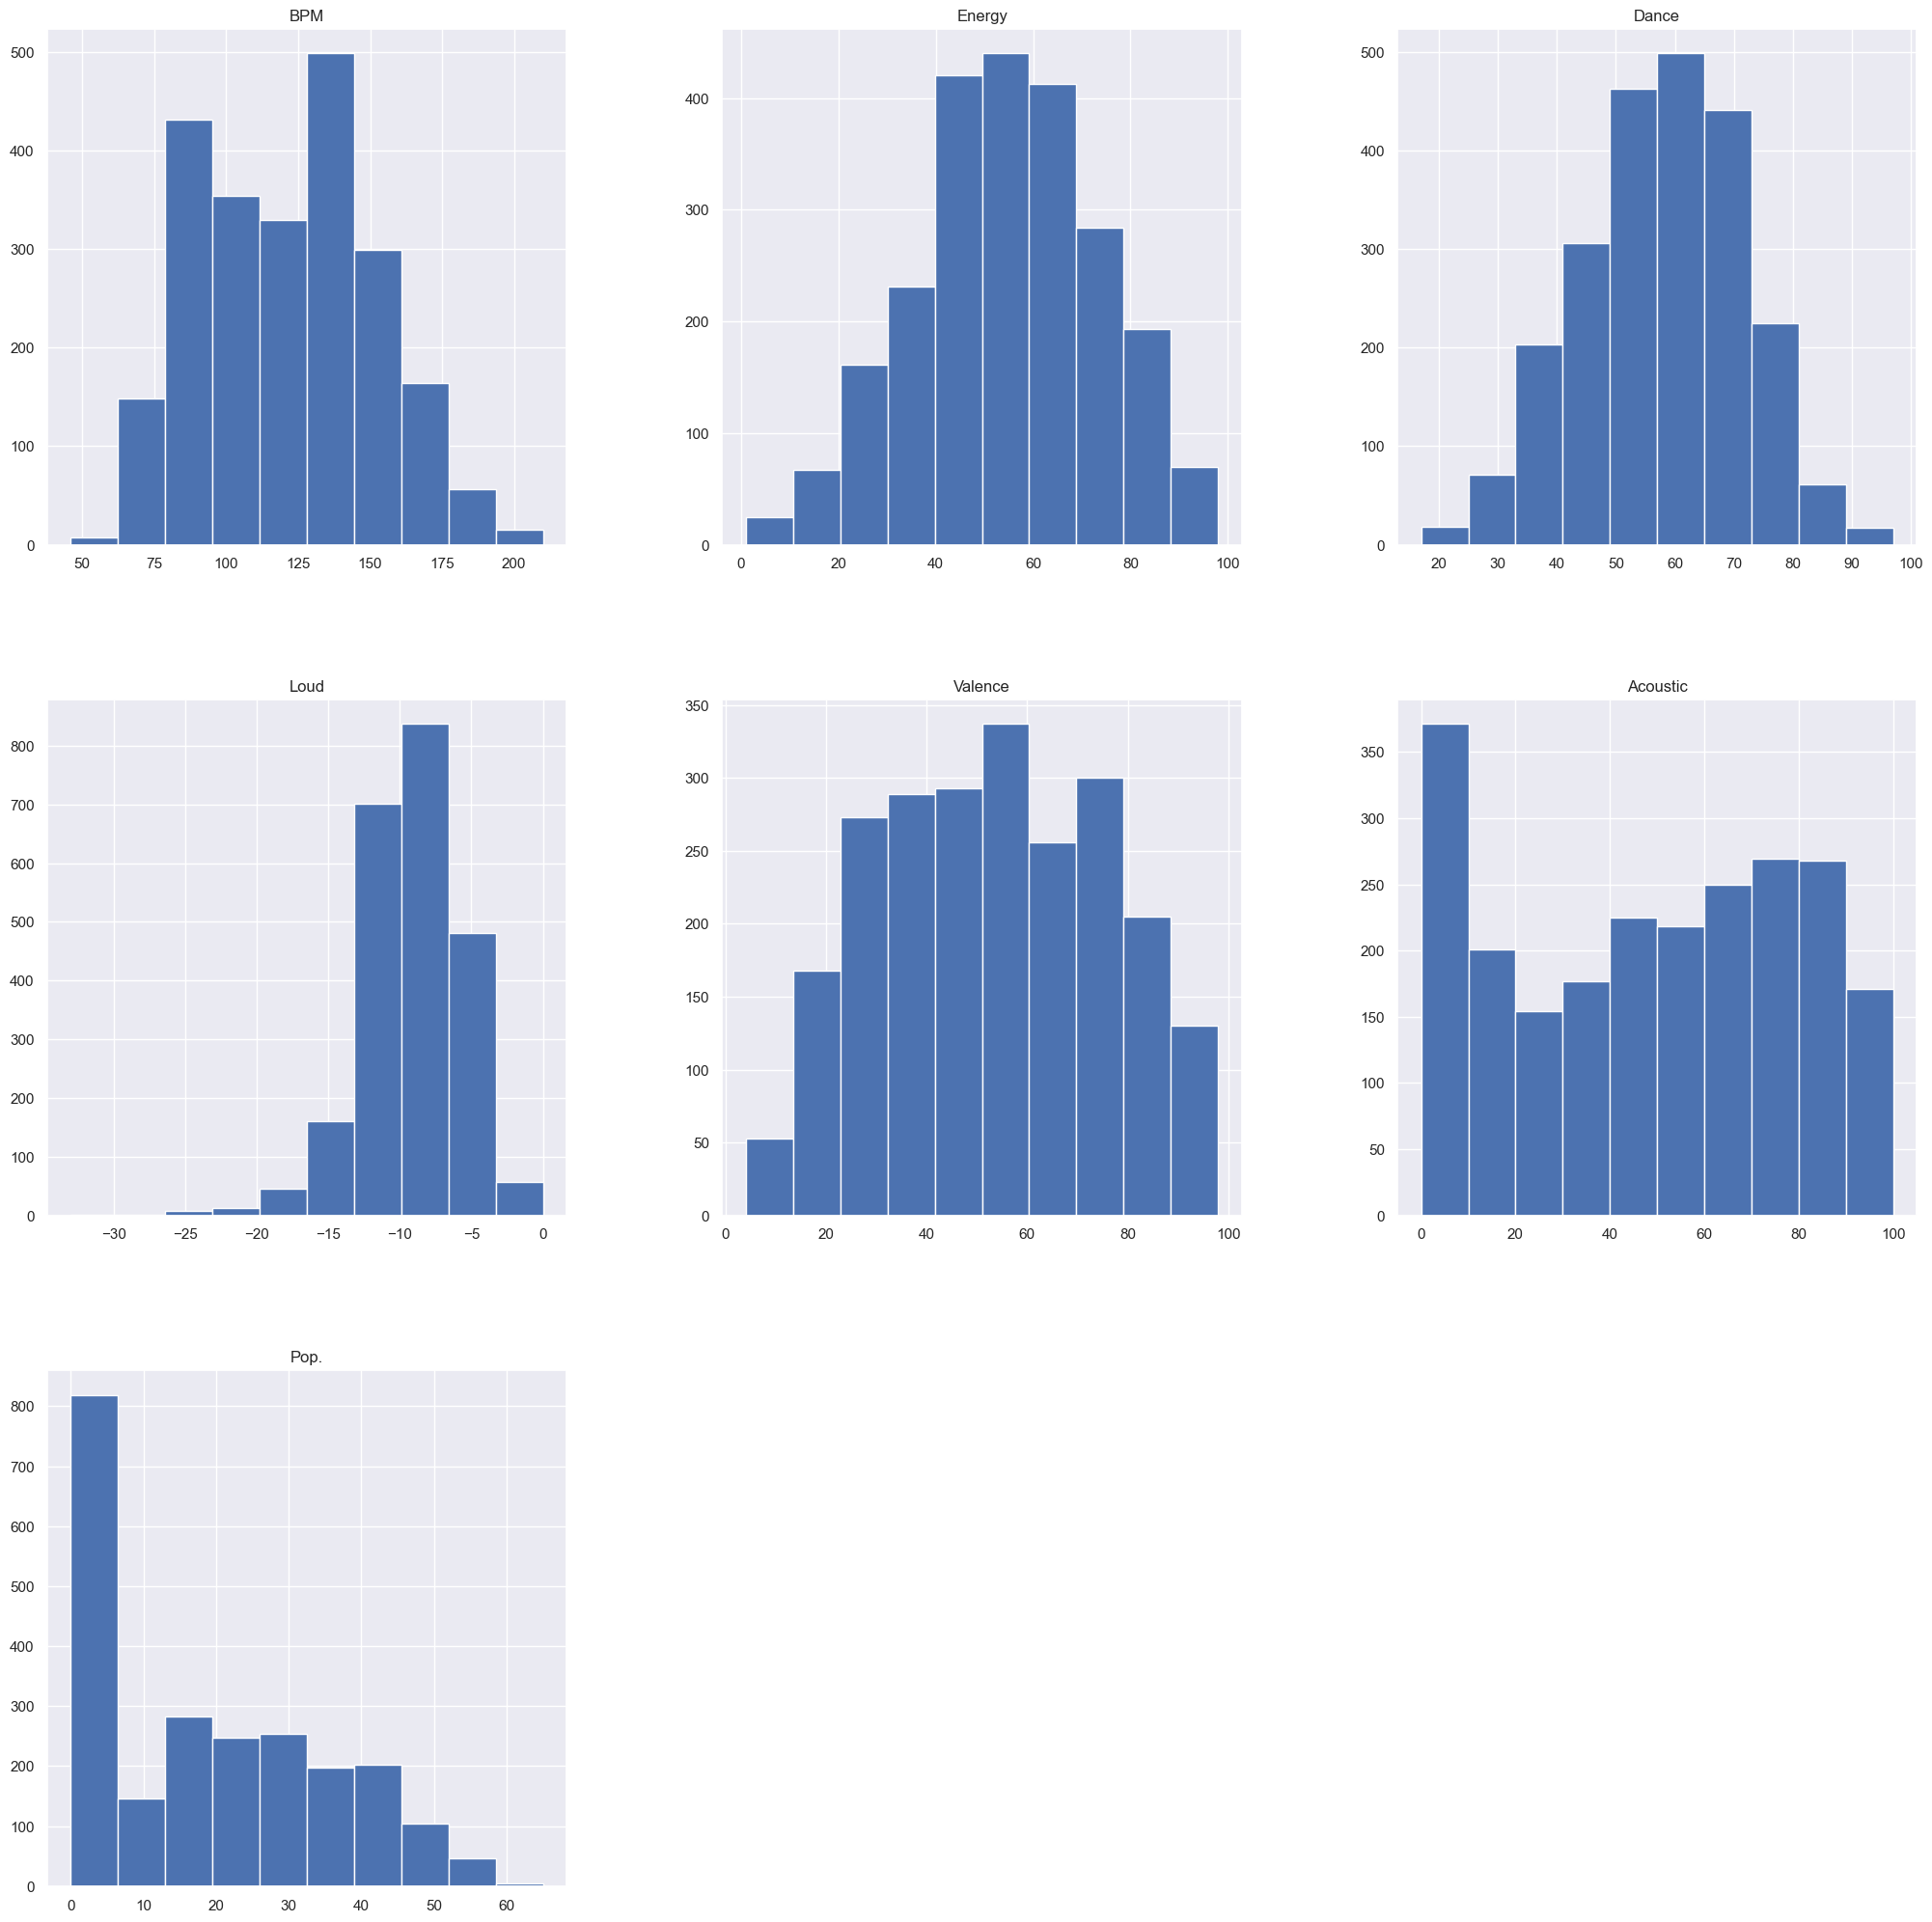

In [ ]:
df.hist(figsize=(25,25))

In [ ]:
print("\nUNIQUE VALUES:")
print(df.nunique().sort_values())


UNIQUE VALUES:
Loud          29
Pop.          62
Dance         78
Valence       95
Energy        97
Acoustic     101
BPM          142
Length       355
Artist       617
Release     1213
Title       2118
dtype: int64


In [ ]:
n = 10
print("Most Famous Artists")
df['Artist'].value_counts()[:n]

Most Famous Artists


Artist
Sugam Pokharel       48
Sushant KC           42
Sajjan Raj Vaidya    41
Swoopna Suman        41
Pramod Kharel        39
Narayan Gopal        36
Raju Lama            35
Lov X                33
Nepathya             31
Bartika Eam Rai      30
Name: count, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2304 entries, 1 to 2340
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     2304 non-null   object 
 1   Artist    2304 non-null   object 
 2   Release   2304 non-null   object 
 3   BPM       2304 non-null   float64
 4   Energy    2304 non-null   float64
 5   Dance     2304 non-null   float64
 6   Loud      2304 non-null   float64
 7   Valence   2304 non-null   float64
 8   Length    2304 non-null   object 
 9   Acoustic  2304 non-null   float64
 10  Pop.      2304 non-null   float64
dtypes: float64(7), object(4)
memory usage: 216.0+ KB


In [ ]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

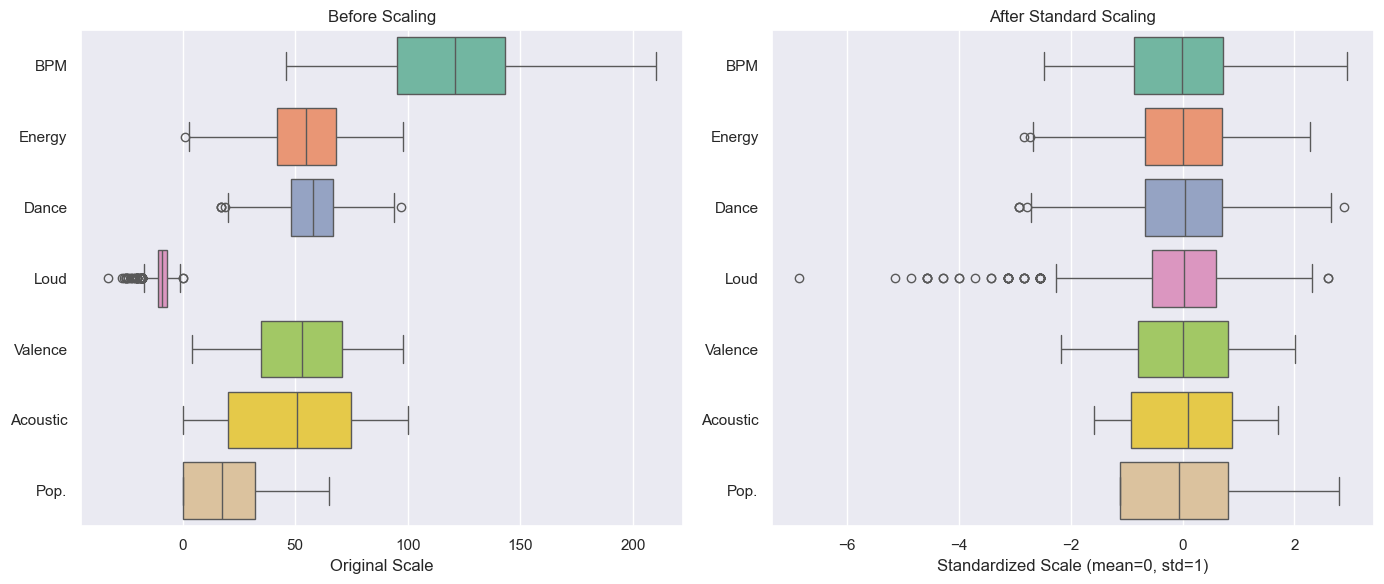

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric features
df_numeric = df.select_dtypes('number')

# Scale the numeric data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Plot side-by-side boxplots for before and after scaling
plt.figure(figsize=(14, 6))

# --- Before Scaling ---
plt.subplot(1, 2, 1)
sns.boxplot(data=df_numeric, orient='h', palette='Set2')
plt.title('Before Scaling')
plt.xlabel('Original Scale')

# --- After Scaling ---
plt.subplot(1, 2, 2)
sns.boxplot(data=df_scaled, orient='h', palette='Set2')
plt.title('After Standard Scaling')
plt.xlabel('Standardized Scale (mean=0, std=1)')

plt.tight_layout()
plt.show()

In [ ]:
df_cluster = df.copy()
X = df_cluster.select_dtypes(include='number').copy()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2304 entries, 1 to 2340
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BPM       2304 non-null   float64
 1   Energy    2304 non-null   float64
 2   Dance     2304 non-null   float64
 3   Loud      2304 non-null   float64
 4   Valence   2304 non-null   float64
 5   Acoustic  2304 non-null   float64
 6   Pop.      2304 non-null   float64
dtypes: float64(7)
memory usage: 144.0 KB


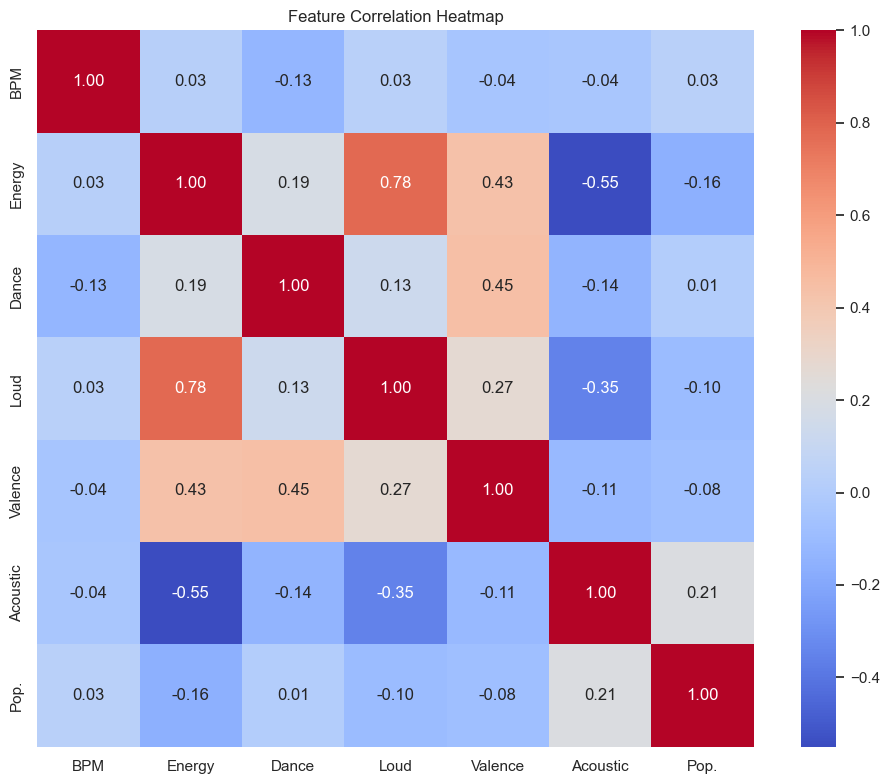

In [ ]:
# Compute correlation matrix
corr = df_scaled.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

Loudness and Energy seems to be postitively correlated ( 0.78), which shows a strong association between them, hence these two can be combined (feature engineering) to have a distinct affecting independent paramater for further study. << left as an further exercise >>

In [ ]:

pca = PCA(n_components=5)  # Try keeping ~90-95% variance
X_pca = pca.fit_transform(X_scaled)

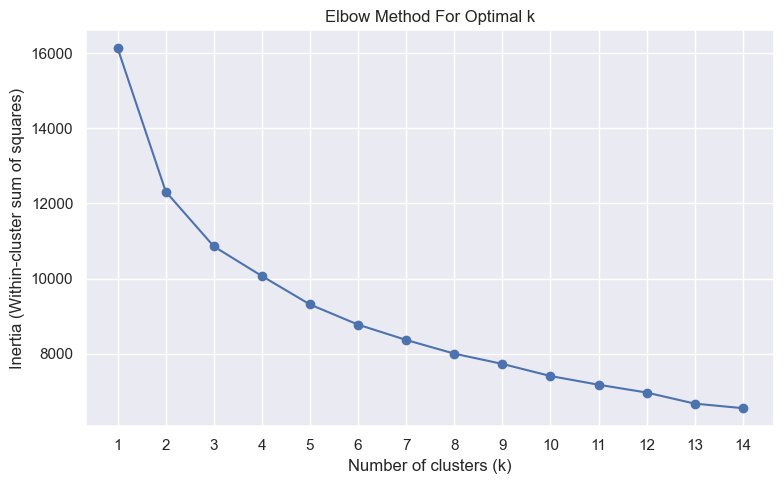

In [ ]:
# elbow - finding out the proper number of clusters
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
k_range = range(1, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()

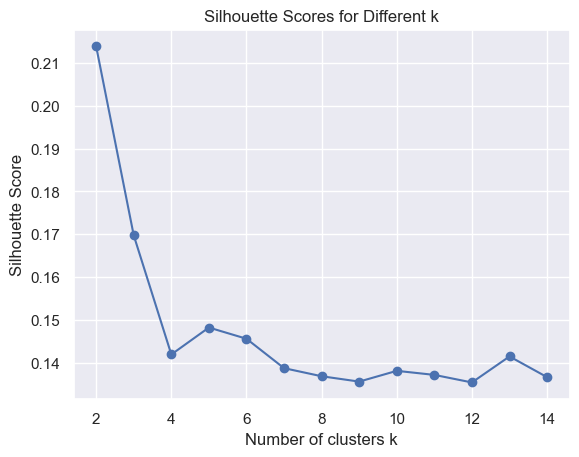

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
k_range = range(2, 15)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores.append(score)

import matplotlib.pyplot as plt

plt.plot(k_range, scores, marker='o')
plt.xlabel('Number of clusters k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.grid(True)
plt.show()


## Cluster Analysis

After performing K-Means clustering (Elbow and Silhouette Scores) on the scaled numerical audio features, we identified 4 distinct clusters within the Spotify dataset.



In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
# Mean values of features per cluster
cluster_profile = df.groupby('Cluster')[X.columns].mean()
print(cluster_profile)

                BPM     Energy      Dance       Loud    Valence   Acoustic  \
Cluster                                                                      
0        127.976695  30.010593  49.489407 -13.243644  34.900424  77.942797   
1        145.043403  64.121528  49.743056  -7.421875  43.894097  28.105903   
2         97.756140  49.119298  57.421053  -9.517544  50.252632  59.317544   
3        115.724490  68.317784  69.004373  -7.243440  75.145773  35.046647   

              Pop.  
Cluster             
0        26.743644  
1        15.704861  
2        17.150877  
3        16.642857  


In [ ]:
df['Cluster'].value_counts().sort_index()

Cluster
0    472
1    576
2    570
3    686
Name: count, dtype: int64

### Cluster Profiles:
The mean values of the features for each cluster provide insights into their characteristics:

- **Cluster 0:** Characterized by lower energy, danceability, valence, and loud values, but higher acousticness. These tracks tend to have an average BPM and moderate popularity.
- **Cluster 1:** Features higher BPM and energy, moderate danceability, and lower acousticness compared to Cluster 0. They also have relatively lower popularity.
- **Cluster 2:** Exhibits the lowest BPM, moderate energy, good danceability, and higher acousticness. Valence is also in the mid-range. Popularity is similar to Cluster 1.
- **Cluster 3:** Shows high danceability, high energy, and high valence, suggesting more upbeat and positive-sounding tracks. Acousticness is lower, and popularity is also moderate.

In [ ]:
df['Cluster'] = kmeans.labels_

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2304 entries, 1 to 2340
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     2304 non-null   object 
 1   Artist    2304 non-null   object 
 2   Release   2304 non-null   object 
 3   BPM       2304 non-null   float64
 4   Energy    2304 non-null   float64
 5   Dance     2304 non-null   float64
 6   Loud      2304 non-null   float64
 7   Valence   2304 non-null   float64
 8   Length    2304 non-null   object 
 9   Acoustic  2304 non-null   float64
 10  Pop.      2304 non-null   float64
 11  Cluster   2304 non-null   int32  
dtypes: float64(7), int32(1), object(4)
memory usage: 225.0+ KB


In [ ]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Add PCA components to your DataFrame
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

In [ ]:
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\n--- Top 10 Popular Tracks in Cluster {cluster_id} ---")
    top_tracks = df[df['Cluster'] == cluster_id].sort_values(by='Pop.', ascending=False).head(10)
    for idx, row in top_tracks.iterrows():
        print(f"{row['Title']} by {row['Artist']} (Popularity: {row['Pop.']})")


--- Top 10 Popular Tracks in Cluster 0 ---
Timro Pratiksa by Shallum Lama (Popularity: 61.0)
Kasari by Yabesh Thapa (Popularity: 59.0)
Jhim Jhimaune Aankha by Ekdev Limbu (Popularity: 58.0)
Risaune Bhaye by Sushant KC (Popularity: 58.0)
Bhikhaari by Oasis Thapa (Popularity: 58.0)
Parkha Na by Sushant KC (Popularity: 57.0)
Vanana Matra by John Rai (Popularity: 57.0)
Farkanna Hola by John Rai (Popularity: 56.0)
K Garu by John Rai (Popularity: 55.0)
Thamana Haat by Samir Shrestha (Popularity: 55.0)

--- Top 10 Popular Tracks in Cluster 1 ---
Sparsha Sangeet by Purna Rai (Popularity: 58.0)
Kalo/Seto by Purna Rai (Popularity: 57.0)
Sapana Ko Mayalu by The Elements (Popularity: 55.0)
Putali by The Elements (Popularity: 52.0)
Timi Bhayera by Akash Khadka (Popularity: 52.0)
Malai Angali Deu by Sabin Rai (Popularity: 51.0)
Phutki Jaaney Jovan by Sajjan Raj Vaidya (Popularity: 51.0)
BABAL by Nawaj Ansari (Popularity: 50.0)
Timi Bhane by Albatross (Popularity: 50.0)
Adhuro Prem by AXIX (Populari


### Top Popular Tracks per Cluster:

- **Cluster 0:** Features tracks like 'Timro Pratiksa' by Shallum Lama and 'Kasari' by Yabesh Thapa, indicating popular songs with generally lower energy and higher acoustic elements.
- **Cluster 1:** Includes popular tracks such as 'Sparsha Sangeet' by Purna Rai and 'Kalo/Seto' also by Purna Rai, often with higher BPM and energy.
- **Cluster 2:** Contains highly popular songs like 'Bardali' and 'Sarangi' by Sushant KC, which tend to have a lower BPM and higher acoustic values.
- **Cluster 3:** Showcases tracks like 'Timi Nacha Na' by Wangden Sherpa and 'Feri Jaalma' by Kali Prasad Baskota, which are likely more energetic and danceable.

In [ ]:
distances = np.zeros(X_scaled.shape[0])

for i in range(X_scaled.shape[0]):
    cluster_id = df.loc[df.index[i], 'Cluster']  # cluster assignment for ith point
    center = kmeans.cluster_centers_[cluster_id]
    distances[i] = np.linalg.norm(X_scaled[i] - center)  # Euclidean distance

# Add distances to df
df['Distance_to_Center'] = distances

# Now, select top 10 closest to center per cluster:
for cluster_id in sorted(df['Cluster'].unique()):
    print(f"\n--- Top 10 closest to center in Cluster {cluster_id} ---")
    closest = df[df['Cluster'] == cluster_id].sort_values('Distance_to_Center').head(10)
    for idx, row in closest.iterrows():
        print(f"{row['Title']} by {row['Artist']} (Distance: {row['Distance_to_Center']:.4f})")


--- Top 10 closest to center in Cluster 0 ---
Banideu by Garage Music (Distance: 0.6224)
Sath Deuna by Kuma Sagar (Distance: 0.7464)
Laija Re by Hemanta Rana (Distance: 0.8548)
Aru Juni by Apurva Tamang (Distance: 0.9626)
Oiliyeko Phool by The Elements (Distance: 0.9717)
Don't Worry by Sushant KC (Distance: 0.9993)
Timiley by Samir Shrestha (Distance: 1.0156)
Radha by Swoopna Suman (Distance: 1.0330)
Kamana by Yabesh Thapa (Distance: 1.0670)
KESHARI (Kabbadi 4- The Final Match) by Baasuri Films (Distance: 1.1051)

--- Top 10 closest to center in Cluster 1 ---
Jaba Din by Sugam Pokharel (Distance: 2.0973)
Mitho Bihani by Topi (Distance: 2.1436)
Jaam Kyare Udera by Ashish Abiral (Distance: 2.1914)
Dukhchha Chhati by Uday Sotang (Distance: 2.1939)
Aayo Timro Yaad Aayo by Deepak Limbu (Distance: 2.2069)
Samjhine Mutu by The Edge Band (Distance: 2.2249)
Kina Hola (From "Hrashwo Deergha") by Sugam Pokharel (Distance: 2.2304)
K Saro Vako by Naren Limbu (Distance: 2.2317)
Ma Bachekai by Ashis



### Tracks Closest to Cluster Centers:
Identifying tracks closest to their cluster centers helps understand the most representative songs for each cluster:

- **Cluster 0:** 'Banideu' by Garage Music is very representative of this cluster's characteristics.
- **Cluster 1:** 'Jaba Din' by Sugam Pokharel is a good example of tracks in this cluster.
- **Cluster 2:** 'Bagaichama Najau Timi' by Udit Narayan is a quintessential track for this group.
- **Cluster 3:** 'Bhanekai Thiye' by Yash Kumar best represents the features of this cluster.

This analysis helps in understanding the different types of music present in the dataset and how they group together based on their audio features.